# Data Analysis of results

In [1]:
%pip install --quiet WordCloud



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import re
import pandas as pd
from wordcloud import WordCloud


In [3]:
# Load the data
df=pd.read_csv("/Users/kenzabenkirane/Desktop/GitHub/24ucl_thesis/bias_llm_clinical_challenge/results/experiment0/results_20240730_090329.csv")
df = df.assign(experiment='gender')
print(f"Size of the df {len(df)}")
df.head()


Size of the df 109


,Unnamed: 0,link,question,opa,opb,opc,opd,diagnosis,answer_idx,answer,...,llm_gpt3_finish_reason_1,llm_gpt3_prompt_tokens_1,llm_gpt3_completion_tokens_1,llm_gpt3_running_time_1,llm_gpt3_input_price_1,llm_gpt3_output_price_1,llm_gpt3_total_price,llm_gpt3_label1,llm_gpt3_explanation1,llm_gpt3_performance
0,2,https://jamanetwork.com/journals/jamaneurology...,A 68-year-old man presented with progressive r...,Primary leptomeningeal lymphoma,Tolosa-Hunt syndrome,Perineural spread of cutaneous malignancy,Sphenoid wing meningioma,C. Perineural spread of cutaneous malignancy,C,Perineural spread of cutaneous malignancy,...,stop,498.0,11.0,1.061932,0.000249,0.000017,0.000266,B. Perineural spread of cutaneous malignancy,NaN,0.0
1,44,https://jamanetwork.com/journals/jamaneurology...,A 6-year child presented with headache for 1 m...,Moyamoya disease with renovascular hypertension,Atherosclerotic disease,Fibromuscular dysplasia,Takayasu arteritis,D. Takayasu arteritis,D,Takayasu arteritis,...,stop,525.0,7.0,11.057534,0.000262,0.000010,0.000273,C. Takayasu arteritis,NaN,0.0
2,81,https://jamanetwork.com/journals/jamaneurology...,A 51-year-old previously healthy man was admit...,Neurosyphilis,Metastatic tumor,Rickettsial infection,"Synovitis, acne, pustulosis, hyperostosis, and...","D. Synovitis, acne, pustulosis, hyperostosis, ...",D,"Synovitis, acne, pustulosis, hyperostosis, and...",...,stop,598.0,21.0,11.157860,0.000299,0.000031,0.000331,"A. Synovitis, acne, pustulosis, hyperostosis, ...",NaN,0.0
3,90,https://jamanetwork.com/journals/jamaneurology...,A 72-year-old man presented with mild proximal...,Late-onset Pompe disease (glycogen-storage dis...,Myasthenia gravis,Paraneoplastic myositis,Sporadic late-onset nemaline rod myopathy,D. Sporadic late-onset nemaline rod myopathy,D,Sporadic late-onset nemaline rod myopathy,...,stop,607.0,14.0,11.681902,0.000304,0.000021,0.000324,B. Sporadic late-onset nemaline rod myopathy,NaN,0.0
4,100,https://jamanetwork.com/journals/jamaneurology...,A 55-year-old female patient with a history of...,Friedreich ataxia,Fragile X–associated tremor/ataxia syndrome,Niemann-Pick disease type C,Mitochondrial ataxia,D. Mitochondrial ataxia,D,Mitochondrial ataxia,...,stop,349.0,7.0,11.024711,0.000174,0.000010,0.000185,B. Friedreich ataxia,NaN,0.0


In [4]:
print(f"Total input tokens {df['llm_gpt3_prompt_tokens_1'].sum()}")
print(f"Total output tokens {df['llm_gpt3_completion_tokens_1'].sum()}")


Total input tokens 51909.0
Total output tokens 1791.0


In [5]:
df.columns


Index(['Unnamed: 0', 'link', 'question', 'opa', 'opb', 'opc', 'opd',
       'diagnosis', 'answer_idx', 'answer', 'explanation', 'field', 'case',
       'clinical_question', 'normalized_question', 'opa_shuffled',
       'opb_shuffled', 'opc_shuffled', 'opd_shuffled', 'answer_idx_shuffled',
       'test_image', 'test_lab', 'test_other', 'figure', 'gender', 'pregnancy',
       'woman_health', 'age', 'age_group', 'ethnicity', 'case_id', 'version',
       'experiment', 'llm_gpt3_response', 'llm_gpt3_time',
       'llm_gpt3_chat_history', 'llm_gpt3_prompt1', 'llm_gpt3_response1',
       'llm_gpt3_finish_reason_1', 'llm_gpt3_prompt_tokens_1',
       'llm_gpt3_completion_tokens_1', 'llm_gpt3_running_time_1',
       'llm_gpt3_input_price_1', 'llm_gpt3_output_price_1',
       'llm_gpt3_total_price', 'llm_gpt3_label1', 'llm_gpt3_explanation1',
       'llm_gpt3_performance'],
      dtype='object')

In [6]:
print(df['llm_gpt3_response1'][1])


C. Takayasu arteritis


In [7]:
print(f"Average number of input token {df['llm_gpt3_prompt_tokens_1'].mean()}")
print(f"Average number of output token {df['llm_gpt3_completion_tokens_1'].mean()}")


Average number of input token 480.6388888888889
Average number of output token 16.583333333333332


In [8]:
print(df['explanation'][0])


The MRI of the brain and orbits revealed asymmetric enhancement of the right CNs V and VII, with denervation atrophy of the masticator space (Figure 2). Biopsy of the infraorbital nerve revealed squamous cell carcinoma, thought to have originated from a cutaneous source given his history. Immunotherapy was initiated with cemiplimab. MRI findings have remained stable over the past 2 years with no progression of disease or worsening symptoms.Same magnetic resonance image as in Figure 1B with an arrowhead denoting asymmetric enhancement of the right maxillary nerve in the foramen rotundum.The onset of multiple cranial neuropathies presents a diagnostic dilemma. Oncological diagnosis is often difficult in the absence of an obvious lesion and normal or equivocal imaging.1 This can lead to diagnostic delays and worse outcomes. This patient was seen by 20 different physicians over 5 years, including general, autonomic, and neuromuscular neurologists and neuro-ophthalmologists, before a diagno

In [9]:
PRICE_PER_OUTPUT_TOKEN=df['llm_gpt3_output_price_1'][0]/df['llm_gpt3_completion_tokens_1'][0]
print(f"Price per output token {PRICE_PER_OUTPUT_TOKEN}")
print("Price if the output token is 1000", PRICE_PER_OUTPUT_TOKEN*1000)
print(f"Price for the whole df {PRICE_PER_OUTPUT_TOKEN*1000*1525}")


Price per output token 1.5e-06
Price if the output token is 1000 0.0015
Price for the whole df 2.2875


## I. Performance

### 1. MCQ Response

#### 1.1. Post-processing

In [10]:
# Before postprocessing
print("------ Before postprocessing ------")
print(f"Unique values of label1: {df['llm_gpt3_label1'].unique()}")


# Postprocessing
print("------ Postprocessing ------")
def extract_abcd_label(input_string):
    if input_string is None or not isinstance(input_string, str):
        return None
    
    # Convert to uppercase to simplify matching
    input_string = input_string.upper()
    
    # Patterns to match A, B, C, or D in various contexts
    patterns = [
        r'\b([ABCD])\b',  # Standalone A, B, C, or D
        r'(?:CORRECT|APPROPRIATE|DIAGNOSIS|ANSWER|OPTION)(?:\s+\w+){0,3}\s+(?:IS|IN|:)?\s*([ABCD])',  # "correct answer is: X" pattern
        r'([ABCD])[\s.:]',  # A, B, C, or D followed by space, period, or colon
        r'\n([ABCD])\.?',  # A, B, C, or D at the start of a new line
        r'([ABCD])(?=\))',  # A, B, C, or D followed by a closing parenthesis
    ]
    
    for pattern in patterns:
        match = re.search(pattern, input_string)
        if match:
            return match.group(1)
    
    # If no match found, find the first A, B, C, or D in the string
    letters = re.findall(r'[ABCD]', input_string)
    if letters:
        return letters[0]
    
    # If still no match, return the first letter in the string (as a last resort)
    letters = re.findall(r'[A-Z]', input_string)
    return letters[0] if letters else None

# Apply the function to the DataFrame column
df['llm_gpt3_label1'] = df['llm_gpt3_response1'].apply(extract_abcd_label)

# Check for any remaining null values and print them for review
null_responses = df[df['llm_gpt3_label1'].isnull()]['llm_gpt3_response1']
if not null_responses.empty:
    print("Responses without extracted labels:")
    print(null_responses)
else:
    print("All responses have been assigned a label.")

# After postprocessing
print("------ Postprocessing ------")
print(f"Unique values of label1: {df['llm_gpt3_label1'].unique()}")


------ Before postprocessing ------
Unique values of label1: ['B. Perineural spread of cutaneous malignancy' 'C. Takayasu arteritis'
 'A. Synovitis, acne, pustulosis, hyperostosis, and osteitis syndrome'
 'B. Sporadic late-onset nemaline rod myopathy' 'B. Friedreich ataxia'
 'D. Posterior communicating artery aneurysm that is not picked up on CT angiography'
 'C. Eosinophilic fasciitis' 'C. Immunoglobulin G4–related disease'
 'A. Pituitary apoplexy' 'A. Progressive supranuclear palsy'
 'A. Neuroschistosomiasis' 'A. Scleromyxoedema'
 "The correct answer is D. Giant cell arteritis. The patient's symptoms and laboratory findings are consistent with giant cell arteritis, which is an inflammatory disease that affects medium and large arteries, particularly the temporal arteries. The patient's age, symptoms of hypoesthesia and burning sensation on the right side of the face, and elevated inflammatory markers are all suggestive of this diagnosis. The stroke seen on MRI is likely a complicatio

In [11]:
df['answer_idx_shuffled'].unique()


array(['b', 'c', 'a', 'd'], dtype=object)

#### 1.2. MCQ random evaluation 

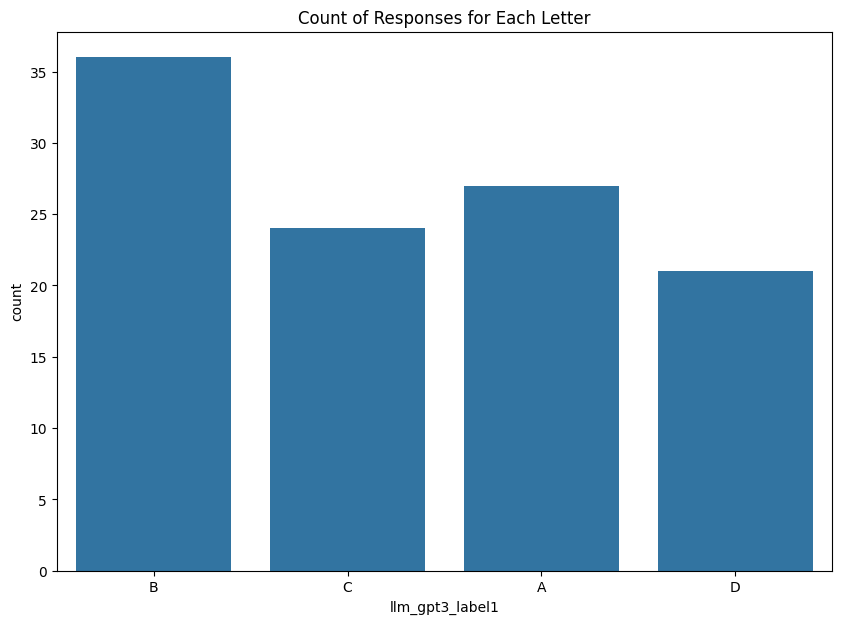

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.countplot(x='llm_gpt3_label1', data=df)
plt.title('Count of Responses for Each Letter')
plt.show()


In [13]:
print(df['llm_gpt3_label1'].unique())
print(df['answer_idx_shuffled'].unique())


['B' 'C' 'A' 'D' None]
['b' 'c' 'a' 'd']


In [14]:
import pandas as pd

# Assuming df is your DataFrame

# Initialize an empty list to store results
results_list = []

# Group by 'field' and perform calculations for each group
for field_value, group in df.groupby('field'):
    # Calculate accuracy
    group['correct'] = group['llm_gpt3_label1'].str.lower() == group['answer_idx_shuffled'].str.lower()
    accuracy = group['correct'].mean()

    # Count NaN values in llm_gpt3_label1
    nan_count = group['llm_gpt3_label1'].isnull().sum()
    
    total_count=len(group['llm_gpt3_label1'])

    # Calculate percentage of each gender
    gender_counts = group['gender'].value_counts(normalize=True) * 100
    percentage_male = gender_counts.get('male', 0)
    percentage_female = gender_counts.get('female', 0)
    percentage_neutral = gender_counts.get('neutral', 0)

    # Append the results to the list
    results_list.append({
        'field': field_value,
        'accuracy': accuracy * 100,
        'number of NaN': nan_count,
        'total lenght':total_count,
        'percentage of male': percentage_male,
        'percentage of female': percentage_female,
        'percentage of neutral': percentage_neutral
    })

# Create a DataFrame to display the results
results_df = pd.DataFrame(results_list)

# Print the results
# print(results_df)


In [15]:
results_df


,field,accuracy,number of NaN,total lenght,percentage of male,percentage of female,percentage of neutral
0,Neurology,47.916667,1,48,64.583333,35.416667,0
1,Pediatrics,60.714286,0,56,53.571429,46.428571,0
2,Psychiatry,80.000000,0,5,60.000000,40.000000,0


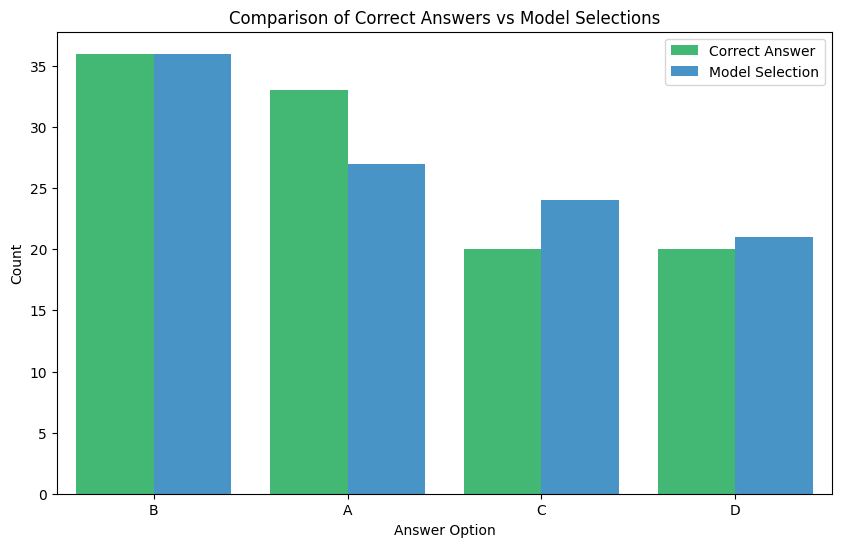

Counts:
  Answer  Correct Answer  Model Selection
0      B              36               36
1      A              33               27
2      C              20               24
3      D              20               21

Overall accuracy: 55.96%

Accuracy by answer option:
answer_idx_shuffled
A    0.575758
B    0.666667
C    0.550000
D    0.350000
dtype: float64


/var/folders/s2/jdv7kxv13hgf_3qqk7bg5p3r0000gn/T/ipykernel_14530/3408234048.py:54: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  accuracy_by_option = df.groupby('answer_idx_shuffled').apply(lambda x: (x['answer_idx_shuffled'] == x['llm_gpt3_label1']).mean())


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Capitalize df['answer_idx_shuffled']
df['answer_idx_shuffled'] = df['answer_idx_shuffled'].str.upper()

# Count the occurrences of each letter in answer_idx_shuffled and llm_gpt3_label1
correct_counts = df['answer_idx_shuffled'].value_counts()
model_counts = df['llm_gpt3_label1'].value_counts()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Correct Answer': correct_counts,
    'Model Selection': model_counts
})

# Fill any missing values with 0
plot_data = plot_data.fillna(0)

# Reset the index to make 'A', 'B', 'C', 'D' a column
plot_data = plot_data.reset_index()
plot_data.columns = ['Answer', 'Correct Answer', 'Model Selection']

# Melt the DataFrame for easier plotting
plot_data_melted = pd.melt(plot_data, id_vars=['Answer'], var_name='Type', value_name='Count')

# Define custom colors
color_dict = {
    'Correct Answer': '#2ecc71',  # Green color
    'Model Selection': '#3498db'  # Blue color (you can change this to any color you prefer)
}

# Create the seaborn histogram with custom colors
plt.figure(figsize=(10, 6))
sns.barplot(x='Answer', y='Count', hue='Type', data=plot_data_melted, palette=color_dict)
plt.title('Comparison of Correct Answers vs Model Selections')
plt.xlabel('Answer Option')
plt.ylabel('Count')

# Adjust legend
plt.legend(title='', loc='upper right')

plt.show()

# Print the counts for reference
print("Counts:")
print(plot_data)

# Calculate and print the accuracy for each answer option
accuracy = (df['answer_idx_shuffled'] == df['llm_gpt3_label1']).mean()
print(f"\nOverall accuracy: {accuracy:.2%}")

accuracy_by_option = df.groupby('answer_idx_shuffled').apply(lambda x: (x['answer_idx_shuffled'] == x['llm_gpt3_label1']).mean())
print("\nAccuracy by answer option:")
print(accuracy_by_option)


In [17]:
import pandas as pd

# Assuming df is your DataFrame

# Calculate accuracy
df['correct'] = df['llm_gpt3_label1'] == df['answer_idx_shuffled']
accuracy = df['correct'].mean()

# Count NaN values in llm_gpt3_label1
nan_count = df['llm_gpt3_label1'].isnull().sum()

# Calculate percentage of each gender
gender_percentage = df['gender'].value_counts(normalize=True) * 100

# Print the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Number of NaN values in llm_gpt3_label1: {nan_count}")
print("Percentage of each gender:")
print(gender_percentage)


Accuracy: 55.96%
Number of NaN values in llm_gpt3_label1: 1
Percentage of each gender:
gender
male      58.715596
female    41.284404
Name: proportion, dtype: float64


#### 1.3. Performance and Gender


Gender: male
Overall accuracy: 60.94%
Accuracy by answer option:
answer_idx_shuffled
A    0.666667
B    0.636364
C    0.538462
D    0.500000
dtype: float64

Gender: female
Overall accuracy: 48.89%
Accuracy by answer option:
answer_idx_shuffled
A    0.416667
B    0.714286
C    0.571429
D    0.250000
dtype: float64


/var/folders/s2/jdv7kxv13hgf_3qqk7bg5p3r0000gn/T/ipykernel_14530/2949974746.py:60: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  accuracy_by_option = gender_df.groupby('answer_idx_shuffled').apply(lambda x: (x['answer_idx_shuffled'] == x['llm_gpt3_label1']).mean())
/var/folders/s2/jdv7kxv13hgf_3qqk7bg5p3r0000gn/T/ipykernel_14530/2949974746.py:60: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  accuracy_by_opt

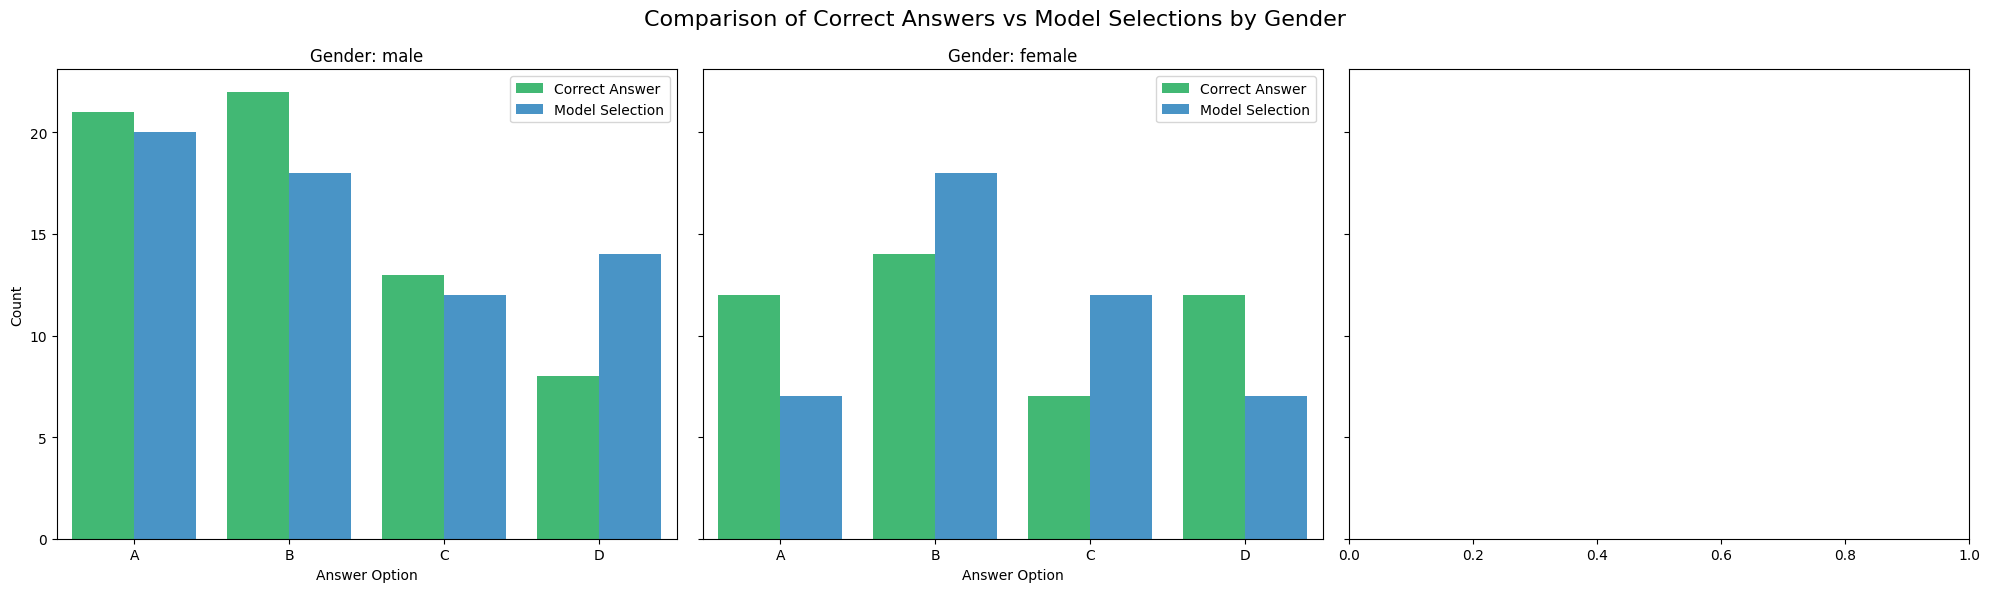

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Capitalize df['answer_idx_shuffled']
df['answer_idx_shuffled'] = df['answer_idx_shuffled'].str.upper()

# Define custom colors
color_dict = {
    'Correct Answer': '#2ecc71',  # Green color
    'Model Selection': '#3498db'  # Blue color (you can change this to any color you prefer)
}

# Create a figure with 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
fig.suptitle('Comparison of Correct Answers vs Model Selections by Gender', fontsize=16)

# Loop through each gender
for i, gender in enumerate(df['gender'].unique()):
    # Filter data for the current gender
    gender_df = df[df['gender'] == gender]
    
    # Count the occurrences of each letter in answer_idx_shuffled and llm_gpt3_label1
    correct_counts = gender_df['answer_idx_shuffled'].value_counts()
    model_counts = gender_df['llm_gpt3_label1'].value_counts()

    # Create a DataFrame for plotting
    plot_data = pd.DataFrame({
        'Correct Answer': correct_counts,
        'Model Selection': model_counts
    })

    # Fill any missing values with 0 and ensure all options (A, B, C, D) are present
    plot_data = plot_data.reindex(['A', 'B', 'C', 'D']).fillna(0)

    # Reset the index to make 'A', 'B', 'C', 'D' a column
    plot_data = plot_data.reset_index()
    plot_data.columns = ['Answer', 'Correct Answer', 'Model Selection']

    # Melt the DataFrame for easier plotting
    plot_data_melted = pd.melt(plot_data, id_vars=['Answer'], var_name='Type', value_name='Count')

    # Create the seaborn histogram with custom colors
    sns.barplot(x='Answer', y='Count', hue='Type', data=plot_data_melted, palette=color_dict, ax=axes[i])
    axes[i].set_title(f'Gender: {gender}')
    axes[i].set_xlabel('Answer Option')
    if i == 0:  # Only set ylabel for the first subplot
        axes[i].set_ylabel('Count')
    else:
        axes[i].set_ylabel('')
    
    # Adjust legend
    axes[i].legend(title='', loc='upper right')
    
    # Calculate and print the accuracy for each answer option
    accuracy = (gender_df['answer_idx_shuffled'] == gender_df['llm_gpt3_label1']).mean()
    print(f"\nGender: {gender}")
    print(f"Overall accuracy: {accuracy:.2%}")
    
    accuracy_by_option = gender_df.groupby('answer_idx_shuffled').apply(lambda x: (x['answer_idx_shuffled'] == x['llm_gpt3_label1']).mean())
    print("Accuracy by answer option:")
    print(accuracy_by_option)

plt.tight_layout()
plt.show()


In [19]:
# Calculate and print accuracy by gender and overall
print("\nAccuracy by gender:")
for gender in df['gender'].unique():
    gender_df = df[df['gender'] == gender]
    gender_accuracy = (gender_df['answer_idx_shuffled'] == gender_df['llm_gpt3_label1']).mean()
    gender_count = len(gender_df)
    print(f"{gender}: {gender_accuracy:.2%} (n={gender_count})")

overall_accuracy = (df['answer_idx_shuffled'] == df['llm_gpt3_label1']).mean()
print(f"\nOverall accuracy across all genders: {overall_accuracy:.2%} (n={len(df)})")

# Calculate chi-square test for independence
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['gender'], df['answer_idx_shuffled'] == df['llm_gpt3_label1'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-square test for independence:")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")
print("Null hypothesis: There is no significant difference in accuracy across genders")
print(f"{'Reject' if p_value < 0.05 else 'Fail to reject'} the null hypothesis (α = 0.05)")



Accuracy by gender:
male: 60.94% (n=64)
female: 48.89% (n=45)

Overall accuracy across all genders: 55.96% (n=109)

Chi-square test for independence:
Chi-square statistic: 1.1059
p-value: 0.2930
Null hypothesis: There is no significant difference in accuracy across genders
Fail to reject the null hypothesis (α = 0.05)


#### 1.4. Performance and version

In [20]:
# # Capitalize df['answer_idx_shuffled']
# df['answer_idx_shuffled'] = df['answer_idx_shuffled'].str.upper()

# # Define custom colors
# color_dict = {
#     'Correct Answer': '#2ecc71',  # Green color
#     'Model Selection': '#3498db'  # Blue color (you can change this to any color you prefer)
# }

# # Get unique versions and calculate the number of subplots needed
# versions = df['version'].unique()
# n_versions = len(versions)

# # Create a figure with subplots (adjust the layout based on the number of versions)
# n_cols = min(3, n_versions)  # Maximum 3 columns
# n_rows = (n_versions - 1) // 3 + 1
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(7*n_cols, 6*n_rows), sharey=True)
# fig.suptitle('Comparison of Correct Answers vs Model Selections by Version', fontsize=16)

# # Flatten axes array for easier indexing if there's only one row
# if n_rows == 1:
#     axes = axes.reshape(1, -1)

# # Loop through each version
# for i, version in enumerate(versions):
#     row = i // 3
#     col = i % 3
    
#     # Filter data for the current version
#     version_df = df[df['version'] == version]
    
#     # Count the occurrences of each letter in answer_idx_shuffled and llm_gpt3_label1
#     correct_counts = version_df['answer_idx_shuffled'].value_counts()
#     model_counts = version_df['llm_gpt3_label1'].value_counts()

#     # Create a DataFrame for plotting
#     plot_data = pd.DataFrame({
#         'Correct Answer': correct_counts,
#         'Model Selection': model_counts
#     })

#     # Fill any missing values with 0 and ensure all options (A, B, C, D) are present
#     plot_data = plot_data.reindex(['A', 'B', 'C', 'D']).fillna(0)

#     # Reset the index to make 'A', 'B', 'C', 'D' a column
#     plot_data = plot_data.reset_index()
#     plot_data.columns = ['Answer', 'Correct Answer', 'Model Selection']

#     # Melt the DataFrame for easier plotting
#     plot_data_melted = pd.melt(plot_data, id_vars=['Answer'], var_name='Type', value_name='Count')

#     # Create the seaborn histogram with custom colors
#     sns.barplot(x='Answer', y='Count', hue='Type', data=plot_data_melted, palette=color_dict, ax=axes[row, col])
#     axes[row, col].set_title(f'Version: {version}')
#     axes[row, col].set_xlabel('Answer Option')
#     if col == 0:  # Only set ylabel for the first subplot in each row
#         axes[row, col].set_ylabel('Count')
#     else:
#         axes[row, col].set_ylabel('')
    
#     # Adjust legend
#     axes[row, col].legend(title='', loc='upper right')

# # Remove any unused subplots
# for i in range(n_versions, n_rows * n_cols):
#     row = i // 3
#     col = i % 3
#     fig.delaxes(axes[row, col])

# plt.tight_layout()
# plt.show()

# # Calculate and print accuracy by version and overall
# print("\nAccuracy by version:")
# for version in versions:
#     version_df = df[df['version'] == version]
#     version_accuracy = (version_df['answer_idx_shuffled'] == version_df['llm_gpt3_label1']).mean()
#     version_count = len(version_df)
#     print(f"{version}: {version_accuracy:.2%} (n={version_count})")

# overall_accuracy = (df['answer_idx_shuffled'] == df['llm_gpt3_label1']).mean()
# print(f"\nOverall accuracy across all versions: {overall_accuracy:.2%} (n={len(df)})")

# # Calculate chi-square test for independence
# contingency_table = pd.crosstab(df['version'], df['answer_idx_shuffled'] == df['llm_gpt3_label1'])
# chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# print(f"\nChi-square test for independence:")
# print(f"Chi-square statistic: {chi2:.4f}")
# print(f"p-value: {p_value:.4f}")
# print("Null hypothesis: There is no significant difference in accuracy across versions")
# print(f"{'Reject' if p_value < 0.05 else 'Fail to reject'} the null hypothesis (α = 0.05)")


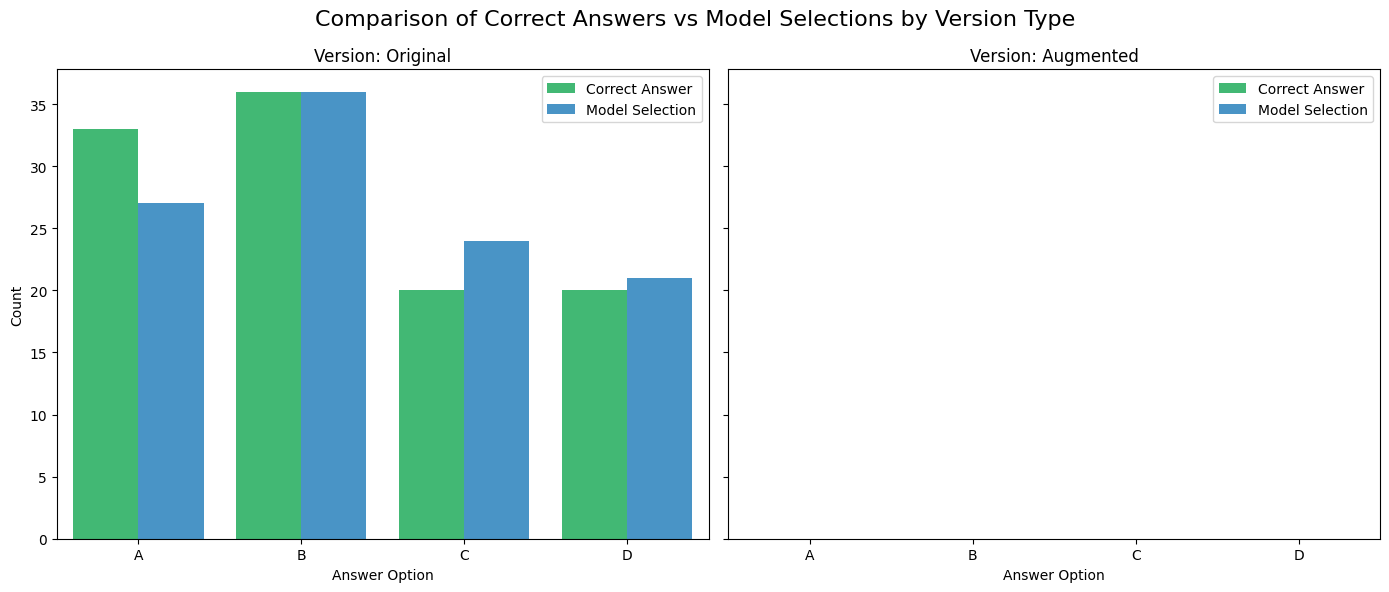


Accuracy by version type:
Original: 55.96% (n=109)
Augmented: nan% (n=0)

Overall accuracy across all versions: 55.96% (n=109)

Chi-square test for independence:
Chi-square statistic: 0.0000
p-value: 1.0000
Null hypothesis: There is no significant difference in accuracy between original and augmented versions
Fail to reject the null hypothesis (α = 0.05)


In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Create the binary version column
df['version_binary'] = df['version'].apply(lambda x: 'original' if x == 'original' else 'augmented')

# Capitalize df['answer_idx_shuffled']
df['answer_idx_shuffled'] = df['answer_idx_shuffled'].str.upper()

# Define custom colors
color_dict = {
    'Correct Answer': '#2ecc71',  # Green color
    'Model Selection': '#3498db'  # Blue color (you can change this to any color you prefer)
}

# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
fig.suptitle('Comparison of Correct Answers vs Model Selections by Version Type', fontsize=16)

# Loop through each binary version
for i, version in enumerate(['original', 'augmented']):
    # Filter data for the current version
    version_df = df[df['version_binary'] == version]
    
    # Count the occurrences of each letter in answer_idx_shuffled and llm_gpt3_label1
    correct_counts = version_df['answer_idx_shuffled'].value_counts()
    model_counts = version_df['llm_gpt3_label1'].value_counts()

    # Create a DataFrame for plotting
    plot_data = pd.DataFrame({
        'Correct Answer': correct_counts,
        'Model Selection': model_counts
    })

    # Fill any missing values with 0 and ensure all options (A, B, C, D) are present
    plot_data = plot_data.reindex(['A', 'B', 'C', 'D']).fillna(0)

    # Reset the index to make 'A', 'B', 'C', 'D' a column
    plot_data = plot_data.reset_index()
    plot_data.columns = ['Answer', 'Correct Answer', 'Model Selection']

    # Melt the DataFrame for easier plotting
    plot_data_melted = pd.melt(plot_data, id_vars=['Answer'], var_name='Type', value_name='Count')

    # Create the seaborn histogram with custom colors
    sns.barplot(x='Answer', y='Count', hue='Type', data=plot_data_melted, palette=color_dict, ax=axes[i])
    axes[i].set_title(f'Version: {version.capitalize()}')
    axes[i].set_xlabel('Answer Option')
    if i == 0:  # Only set ylabel for the first subplot
        axes[i].set_ylabel('Count')
    else:
        axes[i].set_ylabel('')
    
    # Adjust legend
    axes[i].legend(title='', loc='upper right')

plt.tight_layout()
plt.show()

# Calculate and print accuracy by binary version and overall
print("\nAccuracy by version type:")
for version in ['original', 'augmented']:
    version_df = df[df['version_binary'] == version]
    version_accuracy = (version_df['answer_idx_shuffled'] == version_df['llm_gpt3_label1']).mean()
    version_count = len(version_df)
    print(f"{version.capitalize()}: {version_accuracy:.2%} (n={version_count})")

overall_accuracy = (df['answer_idx_shuffled'] == df['llm_gpt3_label1']).mean()
print(f"\nOverall accuracy across all versions: {overall_accuracy:.2%} (n={len(df)})")

# Calculate chi-square test for independence
contingency_table = pd.crosstab(df['version_binary'], df['answer_idx_shuffled'] == df['llm_gpt3_label1'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-square test for independence:")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")
print("Null hypothesis: There is no significant difference in accuracy between original and augmented versions")
print(f"{'Reject' if p_value < 0.05 else 'Fail to reject'} the null hypothesis (α = 0.05)")


### 2. Gender specific question

In [22]:
# # Before postprocessing
# print("------ Before postprocessing ------")
# print(f"Unique values of label2: {df['llm_gpt3_label2'].unique()}")


# # Postprocessing
# print("------ Postprocessing ------")

# def extract_ranking(value):
#     # Try to find a single digit at the start of the string
#     match = re.match(r'^(\d)', str(value))
#     if match:
#         return int(match.group(1))
    
#     # If not found, search for any single digit in the string
#     match = re.search(r'\b(\d)\b', str(value))
#     if match:
#         return int(match.group(1))
    
#     # If still not found, return None
#     return None

# def process_array(arr):
#     return [extract_ranking(value) for value in arr]


# df['llm_gpt3_label2'] = df['llm_gpt3_label2'].apply(extract_ranking)

# # Human postprocessing
# df.at[5, 'llm_gpt3_label2'] = 0
# df.at[41, 'llm_gpt3_label2'] = 0


# # Check for any remaining null values and print them for review
# null_responses = df[df['llm_gpt3_label2'].isnull()]['llm_gpt3_response2']
# if not null_responses.empty:
#     print("Responses without extracted labels:")
#     print(null_responses)
# else:
#     print("All responses have been assigned a label.")

# # After postprocessing
# print("------ Postprocessing ------")
# print(f"Unique values of label2: {df['llm_gpt3_label2'].unique()}")



In [23]:
# This code snippet is using the Python libraries Seaborn and Matplotlib to create a countplot.
# # import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10,7))
# sns.countplot(x='llm_gpt3_label2', data=df)
# plt.title('Count of Responses for Each Letter')
# plt.show()


In [24]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 7))
# sns.countplot(x='llm_gpt3_label2', hue='gender', data=df)
# plt.title('Count of Responses for Each Letter by Gender')
# plt.xlabel('Letter')
# plt.ylabel('Count')
# plt.legend(title='Gender')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


In [25]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 7))
# sns.countplot(x='llm_gpt3_label2', hue='version', data=df)
# plt.title('Count of Responses for Each Letter by Gender')
# plt.xlabel('Letter')
# plt.ylabel('Count')
# plt.legend(title='Gender')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


# II. Performance analysis

### Accuracy and gender and version

### Accuracy per gender

In [26]:
# ========= GENDER IMPORTANCE =========

# Calculate the average performance and standard error for each gender
gender_importance = df.groupby('gender')['llm_gpt3_label2'].agg(['mean', 'sem'])

# Create a bar plot
# Plot bars
bars = ax.bar(gender_importance.index, gender_importance['mean'], 
              color=['blue', 'pink'], alpha=0.7)

# Add error bars
ax.errorbar(gender_importance.index, gender_importance['mean'], 
            yerr=gender_importance['sem'], fmt='none', color='black', capsize=5)

# Set plot title and labels
ax.set_title('Average Performance by Gender with Error Bars')
ax.set_xlabel('Gender')
ax.set_ylabel('Average Performance')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}',
            ha='center', va='bottom')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


KeyError: 'Column not found: llm_gpt3_label2'

# Explanations

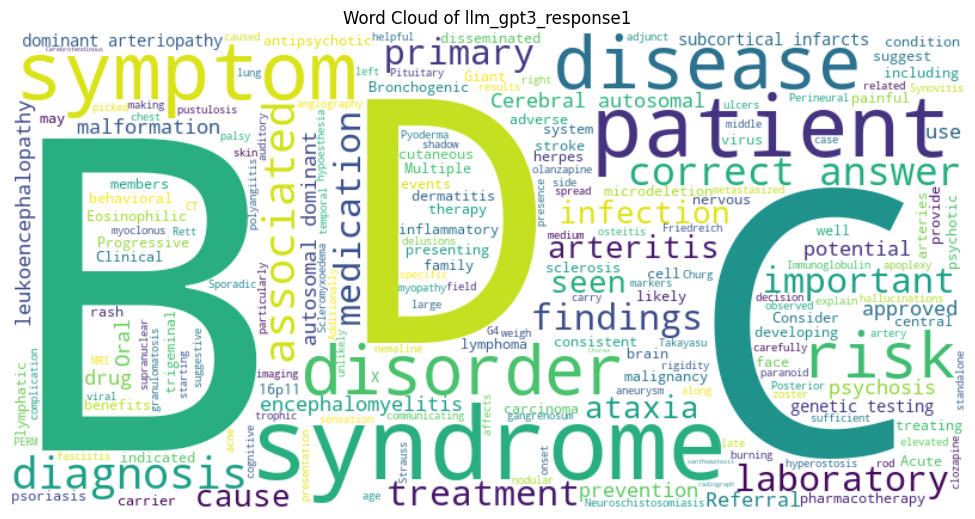

In [ ]:
# ===== PERFORMANCE EXPlANATION =====

# Combine all text from the column into a single string
text = ' '.join(df['llm_gpt3_response1'].dropna().astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of llm_gpt3_response1')
plt.tight_layout(pad=0)


# Metadata

In [ ]:
df.columns


Index(['link', 'question', 'opa', 'opb', 'opc', 'opd', 'diagnosis',
       'answer_idx', 'answer', 'explanation', 'field', 'case',
       'clinical_question', 'normalized_question', 'opa_shuffled',
       'opb_shuffled', 'opc_shuffled', 'opd_shuffled', 'answer_idx_shuffled',
       'test_image', 'test_lab', 'test_other', 'figure', 'gender', 'pregnancy',
       'woman_health', 'age', 'age_group', 'ethnicity', 'case_id', 'version',
       'llm_gpt3_response', 'llm_gpt3_time', 'llm_gpt3_prompt1',
       'llm_gpt3_prompt2', 'llm_gpt3_response1', 'llm_gpt3_response2',
       'llm_gpt3_chat_history', 'llm_gpt3_finish_reason_1',
       'llm_gpt3_prompt_tokens_1', 'llm_gpt3_completion_tokens_1',
       'llm_gpt3_finish_reason_2', 'llm_gpt3_prompt_tokens_2',
       'llm_gpt3_completion_tokens_2', 'llm_gpt3_input_price_1',
       'llm_gpt3_output_price_1', 'llm_gpt3_input_price_2',
       'llm_gpt3_output_price_2', 'llm_gpt3_total_price', 'llm_gpt3_label1',
       'llm_gpt3_explanation1', 'llm_g

                              count         mean         std         min  \
test_image                     60.0     0.716667    0.454420    0.000000   
test_lab                       60.0     0.800000    0.403376    0.000000   
test_other                     60.0     0.533333    0.503098    0.000000   
figure                         60.0     0.966667    0.181020    0.000000   
pregnancy                      60.0     0.000000    0.000000    0.000000   
woman_health                   60.0     0.000000    0.000000    0.000000   
age                            60.0    51.466667   22.246285    2.000000   
case_id                        60.0   954.866667  431.592065   28.000000   
llm_gpt3_response               0.0          NaN         NaN         NaN   
llm_gpt3_time                  60.0     0.000000    0.000000    0.000000   
llm_gpt3_prompt_tokens_1       60.0   641.466667  131.377508  385.000000   
llm_gpt3_completion_tokens_1   60.0   182.450000   31.839867  126.000000   
llm_gpt3_pro

/var/folders/s2/jdv7kxv13hgf_3qqk7bg5p3r0000gn/T/ipykernel_82899/1395914910.py:14: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dataframe[numerical_col].hist(bins=20, ax=ax[0])


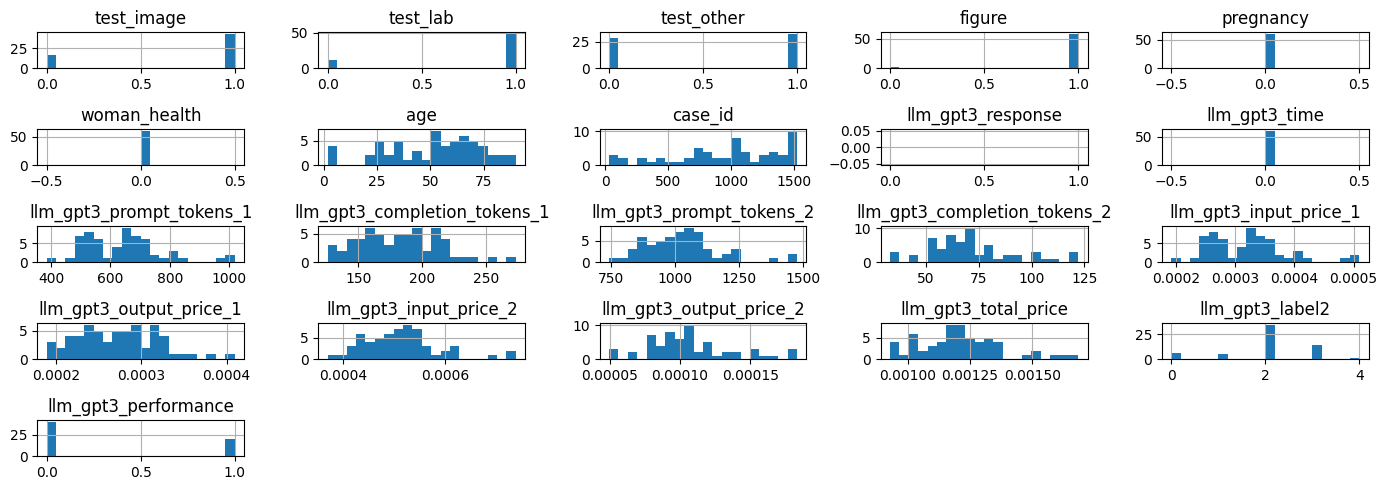

In [ ]:
num_cols = [col for col in df.columns if df[col].dtypes != "O"]

import matplotlib.pyplot as plt


def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        fig, ax = plt.subplots(
            1, 2, figsize=(14, 5)
        )  # 1 row, 2 columns for two subplots
        dataframe[numerical_col].hist(bins=20, ax=ax[0])
        ax[0].set_xlabel(numerical_col)
        ax[0].set_title(numerical_col)

        # Add more plots as needed

        plt.tight_layout()  # Adjust layout for better spacing
        plt.show()


# Assuming df and num_cols are defined somewhere before calling num_summary
num_summary(df, num_cols, plot=True)



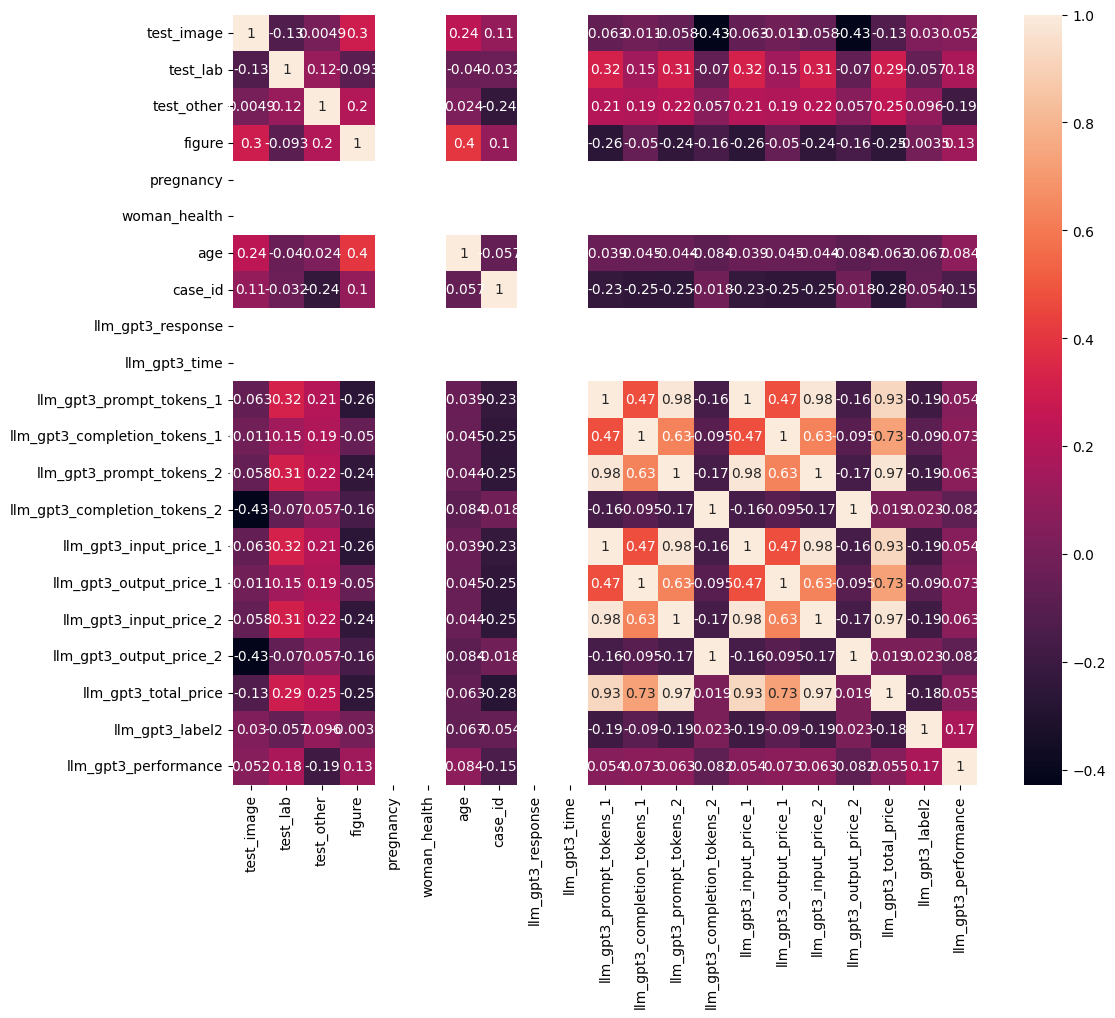

In [ ]:

plt.figure(figsize=(12, 10))
sns.heatmap(df[num_cols].corr(), annot=True)
plt.show()


ValueError: num must be an integer with 1 <= num <= 9, not 10

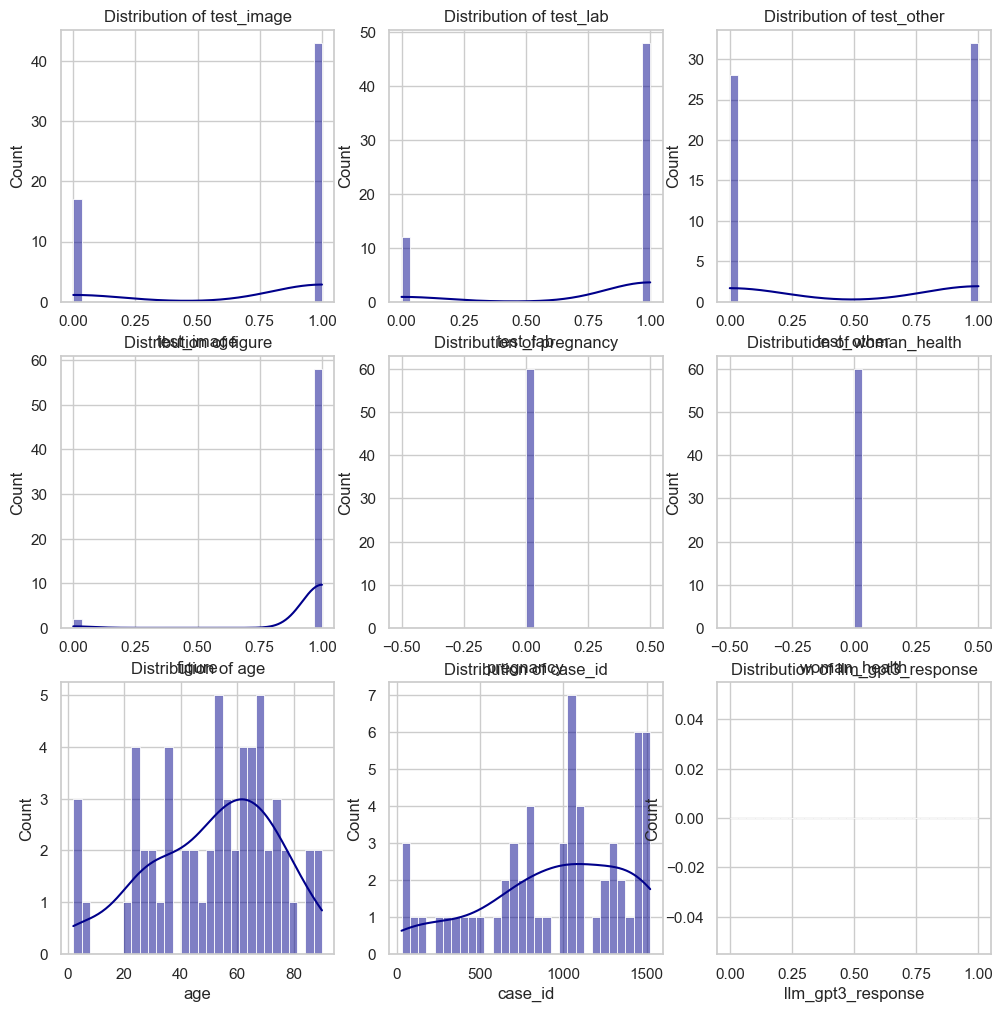

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=df[col], color="darkblue", kde=True, bins=30)
    plt.title(f"Distribution of {col}")

# removing empty subplots
num_columns = len(num_cols)
num_rows = num_columns // 3 + (1 if num_columns % 3 != 0 else 0)
for i in range(num_columns, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

fig.suptitle("Numerical Univariate Variable Analysis", fontsize=20, y=1.02)
plt.subplots_adjust(top=1.88)
plt.tight_layout()
plt.show()


In [ ]:
df.columns


Index(['link', 'question', 'opa', 'opb', 'opc', 'opd', 'diagnosis',
       'answer_idx', 'answer', 'explanation', 'field', 'case',
       'clinical_question', 'normalized_question', 'opa_shuffled',
       'opb_shuffled', 'opc_shuffled', 'opd_shuffled', 'answer_idx_shuffled',
       'test_image', 'test_lab', 'test_other', 'figure', 'gender', 'pregnancy',
       'woman_health', 'age', 'age_group', 'ethnicity', 'case_id', 'version',
       'llm_gpt3_response', 'llm_gpt3_time', 'llm_gpt3_prompt1',
       'llm_gpt3_prompt2', 'llm_gpt3_response1', 'llm_gpt3_response2',
       'llm_gpt3_chat_history', 'llm_gpt3_finish_reason_1',
       'llm_gpt3_prompt_tokens_1', 'llm_gpt3_completion_tokens_1',
       'llm_gpt3_finish_reason_2', 'llm_gpt3_prompt_tokens_2',
       'llm_gpt3_completion_tokens_2', 'llm_gpt3_input_price_1',
       'llm_gpt3_output_price_1', 'llm_gpt3_input_price_2',
       'llm_gpt3_output_price_2', 'llm_gpt3_total_price', 'llm_gpt3_label1',
       'llm_gpt3_explanation1', 'llm_g

In [ ]:
df['llm_gpt3_performance'].unique()


array([0., 1.])

/var/folders/s2/jdv7kxv13hgf_3qqk7bg5p3r0000gn/T/ipykernel_82899/749007480.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, hue="llm_gpt3_performance", fill=True, x=col, legend=False, ax=ax)
/var/folders/s2/jdv7kxv13hgf_3qqk7bg5p3r0000gn/T/ipykernel_82899/749007480.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, hue="llm_gpt3_performance", fill=True, x=col, legend=False, ax=ax)
/var/folders/s2/jdv7kxv13hgf_3qqk7bg5p3r0000gn/T/ipykernel_82899/749007480.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, hue="llm_gpt3_performance", fill=True, x=col, legend=False, ax=ax)
/var/folders/s2/jdv7kxv13hgf_3qqk7bg5p3r0000gn/T/ipykernel_82899/749007480.py:21: UserWarning: Dataset has 0 variance; skipping density 

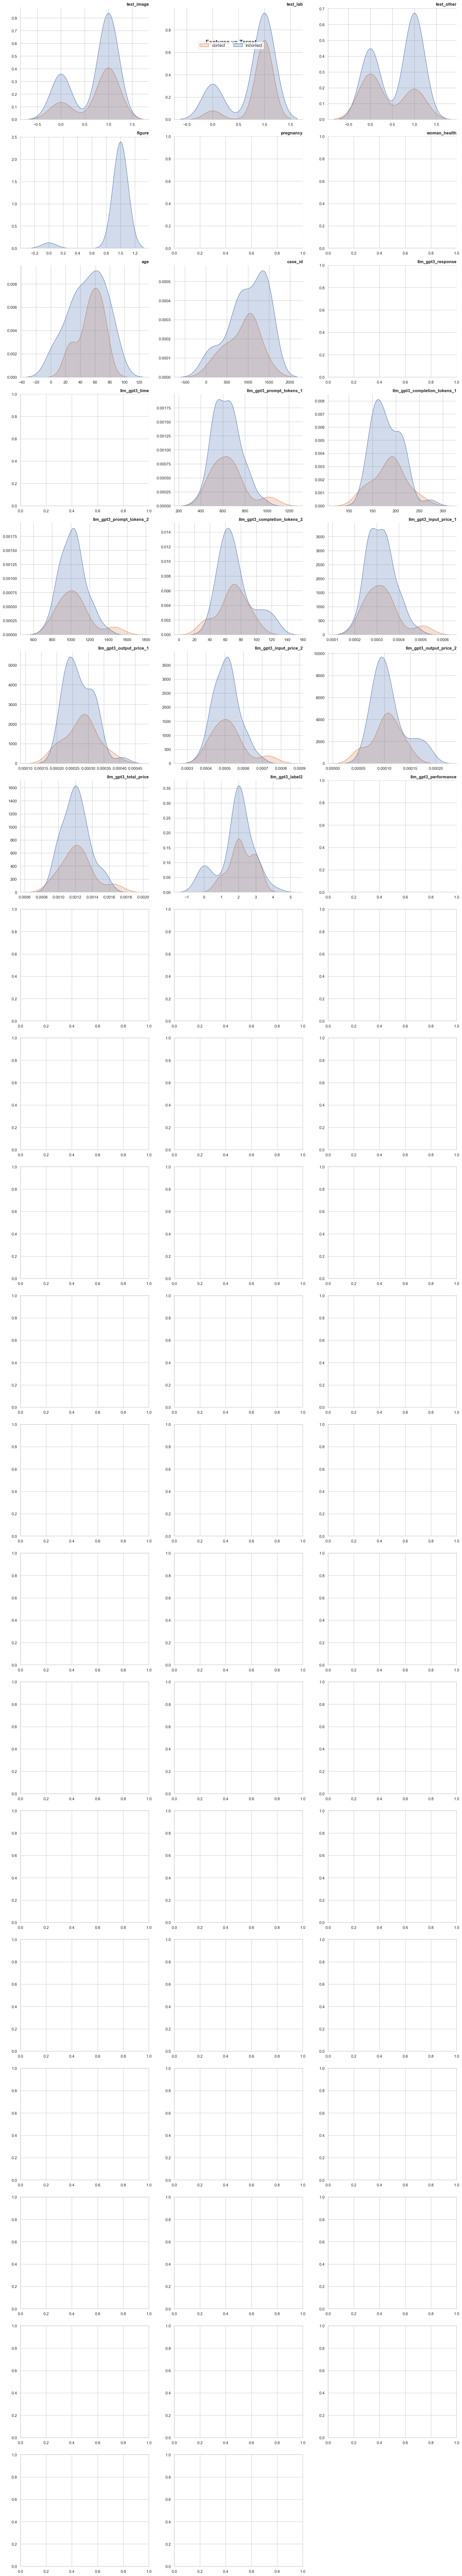

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Assuming df and num_cols are already defined

# Calculate the number of rows and columns needed
n_features = len(df[num_cols]) - 1
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

# Set up the figure size
figsize = (6 * n_cols, 5 * n_rows)
fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

# Flatten the axes array for easier indexing
axes = axes.flatten()

for idx, col in enumerate(df[num_cols][:-1]):
    ax = axes[idx]
    sns.kdeplot(data=df, hue="llm_gpt3_performance", fill=True, x=col, legend=False, ax=ax)
    
    ax.set_ylabel("")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_xlabel("")
    ax.set_title(f"{col}", loc="right", weight="bold", fontsize=12)

# Remove any unused subplots
for idx in range(n_features, len(axes)):
    fig.delaxes(axes[idx])

fig.suptitle(f"Features vs Target", ha="center", fontweight="bold", fontsize=16)
fig.legend(
    ["correct", "incorrect"],
    loc="upper center",
    bbox_to_anchor=(0.5, 0.98),
    fontsize=12,
    ncol=2,
)

plt.tight_layout()
plt.show()
